<AxesSubplot:xlabel='year'>

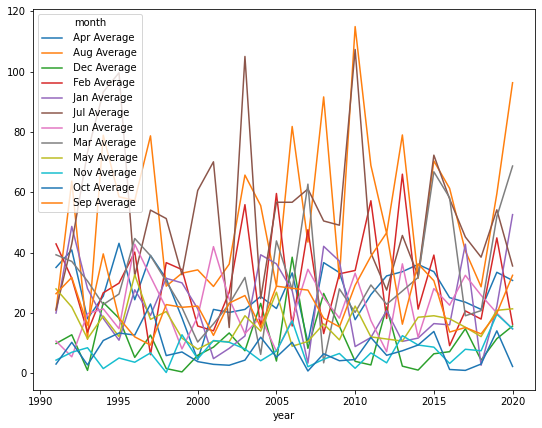

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

#for visualization of initial dataset
rf = pd.read_csv('pk_rainfall.csv')
rf.pivot_table(values="rainfall", index="year", columns="month").plot(figsize=(9,7))

In [2]:
#using training dataset to train model. 
rf = pd.read_csv('pk_rainfall.csv')
rf.head()

,rainfall,year,month
0,20.0,1991,Jan Average
1,42.9,1991,Feb Average
2,39.3,1991,Mar Average
3,35.1,1991,Apr Average
4,28.0,1991,May Average


In [3]:
#converting month(string) to numeric months. 
import datetime
rf_test = rf['month'].map(lambda x: x.lstrip(' ').rstrip('Average'))
rf_test_n = rf_test.map(lambda x: x.lstrip('').rstrip(' ')).to_numpy()
rf_test_months = []

for i in range (len(rf_test_n)):
    datetime_object = datetime.datetime.strptime(rf_test_n[i], "%b")
    month_number = datetime_object.month
    rf_test_months.append(month_number)

rf_input_month = pd.DataFrame(rf_test_months, columns=['month'])
rf['month'] = rf_input_month['month']

-130.39684500735945
[ 0.08211161 -1.33280886]
     Actual-Rainfall  Predicted-Rainfall
0               20.0           31.754553
1               42.9           30.421744
2               39.3           29.088935
3               35.1           27.756126
4               28.0           26.423317
..               ...                 ...
355             96.3           24.806127
356             32.5           23.473318
357              2.3           22.140509
358             14.8           20.807701
359             15.7           19.474892

[360 rows x 2 columns]


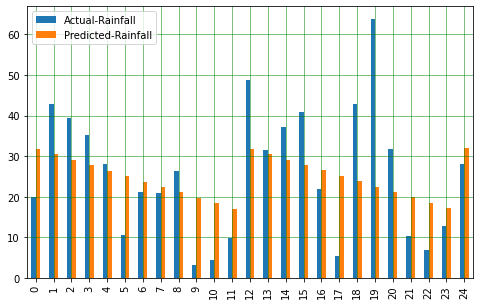

In [4]:
from sklearn.metrics import accuracy_score
rf_output = rf['rainfall']
rf_input = rf[['year','month']]
lr_model = LinearRegression()
lr_model.fit(rf_input, rf_output)
rf_predict = lr_model.predict(rf_input)

print(lr_model.intercept_)
print(lr_model.coef_)

df = pd.DataFrame({'Actual-Rainfall': rf_output, 'Predicted-Rainfall': rf_predict})
print(df)

df1 = df.head(25)
df1.plot(kind='bar',figsize=(8,5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()




In [5]:
user_input_month = 4
user_input_year = 2021 
test_user_predict = lr_model.predict([[user_input_year, user_input_month]]) 
print (test_user_predict)

[30.21947425]


In [6]:
pd.to_pickle(lr_model,r'..\rainfall_model.pickle')